In [24]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#Reading the dataset
df = pd.read_csv('/content/Netflix Dataset.csv')

In [7]:
#Reading the top of the data
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [11]:
#Checking for Duplicate
df.duplicated().value_counts()

,count
False,7787
True,2


In [13]:
# Convert 'Release_Date' to datetime, coerce errors to NaT for invalid/missing formats
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Check how many failed conversions (NaT values)
missing_release_dates = df['Release_Date'].isnull().sum()
print(f"Number of missing or invalid release dates: {missing_release_dates}")

# Preview converted data column
print(df[['Release_Date']].head())


Number of missing or invalid release dates: 98
  Release_Date
0   2020-08-14
1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01


In [14]:
# Drop rows with missing release dates
df = df.dropna(subset=['Release_Date'])

# Verify the drop
print(f"Remaining rows after dropping missing dates: {len(df)}")


Remaining rows after dropping missing dates: 7691


In [15]:
# Create a new column 'Year' based on 'Release_Date' for trend analysis
df['Year'] = df['Release_Date'].dt.year

# Verify the new column
print(df[['Release_Date', 'Year']].head())


  Release_Date  Year
0   2020-08-14  2020
1   2016-12-23  2016
2   2018-12-20  2018
3   2017-11-16  2017
4   2020-01-01  2020


/tmp/ipython-input-4128505448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Release_Date'].dt.year


In [16]:
# Create a new column 'Year' based on 'Release_Date' for trend analysis
df['Year'] = df['Release_Date'].dt.year

# Verify the new column
print(df[['Release_Date', 'Year']].head())


  Release_Date  Year
0   2020-08-14  2020
1   2016-12-23  2016
2   2018-12-20  2018
3   2017-11-16  2017
4   2020-01-01  2020


/tmp/ipython-input-4128505448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Release_Date'].dt.year


In [17]:
# Fill missing 'Country' and 'Type' with 'Unknown' to avoid errors during groupings
df['Country'] = df['Country'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')

# Confirm the number of missing values after filling
print(f"Missing values in 'Country' after fill: {df['Country'].isnull().sum()}")
print(f"Missing values in 'Type' after fill: {df['Type'].isnull().sum()}")


Missing values in 'Country' after fill: 0
Missing values in 'Type' after fill: 0


/tmp/ipython-input-2048248075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].fillna('Unknown')
/tmp/ipython-input-2048248075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].fillna('Unknown')


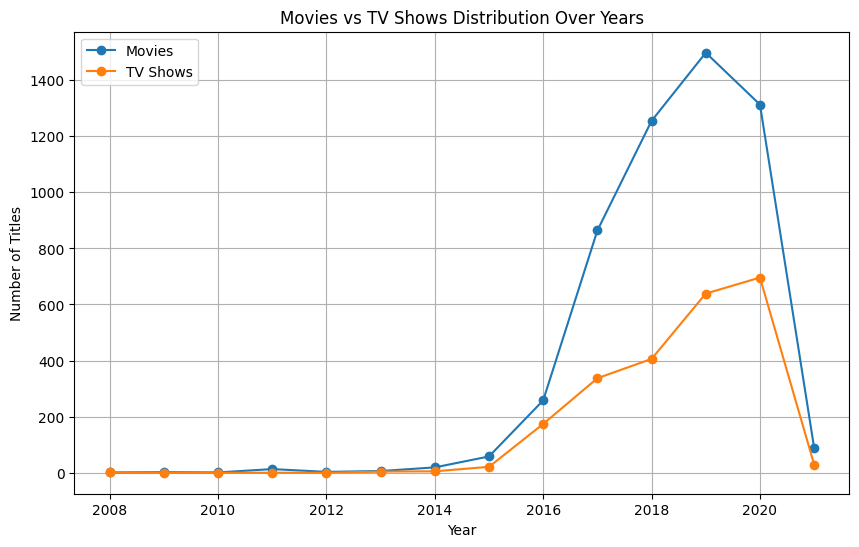

In [18]:

# Group by 'Year' and 'Category' ('Movie' or 'TV Show')
content_dist = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(content_dist.index, content_dist.get('Movie', 0), marker='o', label='Movies')
plt.plot(content_dist.index, content_dist.get('TV Show', 0), marker='o', label='TV Shows')
plt.title('Movies vs TV Shows Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend()
plt.show()


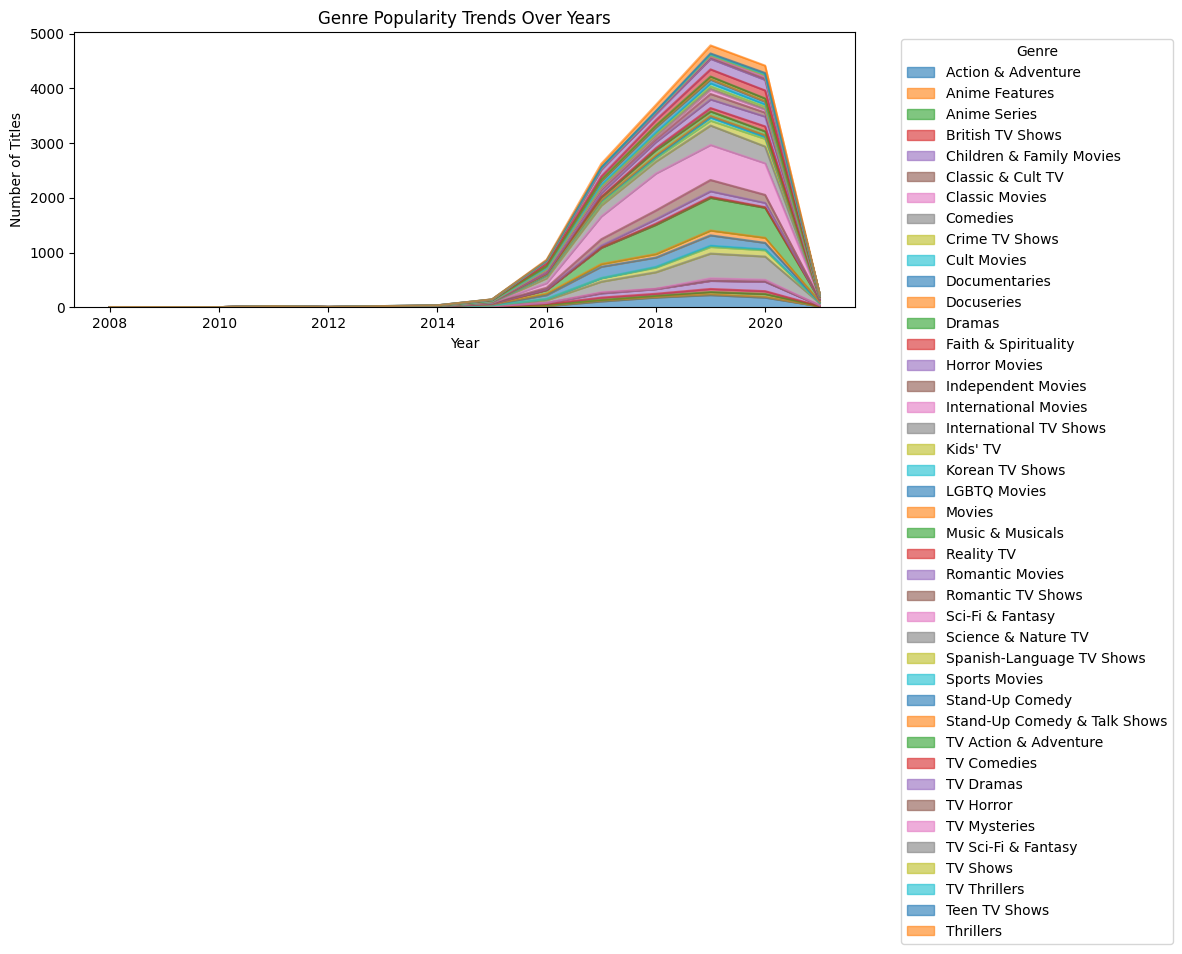

In [21]:
# Split multi-genres for each title and explode into separate rows
exploded_genres = df['Type'].str.split(',').explode().str.strip().reset_index()

# Rename column for clarity
exploded_genres.columns = ['index', 'Genre']

# Merge back with original dataframe on index
df_genres = df.reset_index().merge(exploded_genres, left_on='index', right_on='index').set_index('index')

# Group by Year and Genre, count titles
genre_trend = df_genres.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot genre trends as stacked area chart
genre_trend.plot.area(alpha=0.6, figsize=(12,7))
plt.title("Genre Popularity Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


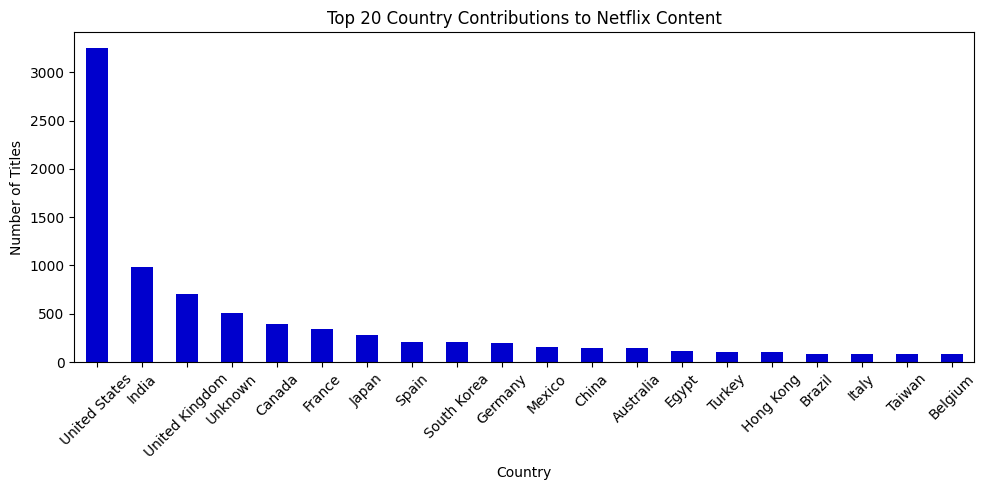

In [22]:
# Split multi-country entries and explode into separate rows
exploded_countries = df['Country'].str.split(',').explode().str.strip()

# Count titles per country and get top 20 contributors
top_countries = exploded_countries.value_counts().head(20)

# Plot top 20 countries bar chart
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='mediumblue')
plt.title('Top 20 Country Contributions to Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
